In [ ]:
#### Is there an age skew in how Leave/Remain vote effect 17->19 shifts?

In [22]:
%%time
dataset_name = "W16_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

# del BES_Panel

Toggle code

Wall time: 3.86 s


In [2]:
# BES_Panel_19 = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta")
# data = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta", iterator = True)
# labels_19 = data.variable_labels()
memory_use(locs = locals().items())

                     BES_Panel:  25.8MiB
                   BES_reduced:  24.0MiB
              pan_dataset_ages:  16.7MiB
       pan_dataset_allr_values:   8.1MiB
             pan_dataset_votes:   6.6MiB
             BES_file_manifest:  61.9KiB
                  XGBRegressor:   2.0KiB
                      manifest:   1.6KiB
                          HTML:   1.0KiB
                StandardScaler:   1.0KiB


In [168]:
pan_dataset_votes["2005GEVote_complete"].cat.categories
gc.collect()

20

In [6]:
pan_dataset_votes["2016EUVote_complete"].cat.categories
euref_dict = {'DK':np.nan, 'LEAVE':"LEAVE", 'REMAIN':"REMAIN", 'DNV':np.nan, 'TYTV(Def)':np.nan, 'TYTV(Maybe)':np.nan,
       'Not Present':np.nan, 'UNK':np.nan}
euref2016 = pan_dataset_votes["2016EUVote_complete"].replace(euref_dict)
euref2016.value_counts()
#["2019GEVote_complete"].cat.categories

REMAIN    38027
LEAVE     33018
Name: 2016EUVote_complete, dtype: int64

In [ ]:
### Look at "Leave" and "Remain" 2017-2019 realignment on by Leave/Remain vote

# split by age

In [7]:
bloc_replace_dict = {'BNP':"LeaveBloc", 'CON':"LeaveBloc", 'DK':np.nan, 'GP':"RemainBloc", 'LAB':"RemainBloc", 'LD':"RemainBloc", 'OTH':np.nan, 'PC':"RemainBloc", 'SNP':"RemainBloc", 'UKIP':"LeaveBloc",
       'DNV':"NonVoteBloc", 'TYTV(Def)':np.nan, 'TYTV(Maybe)':np.nan, 'Not Present':np.nan, 'UNK':np.nan,"BXP":np.nan,"BNP":"LeaveBloc",}

In [8]:
Bloc2005 = pan_dataset_votes["2005GEVote_complete"].replace(bloc_replace_dict)
Bloc2005.value_counts(dropna=False)

NaN            36587
RemainBloc     31391
LeaveBloc      18286
NonVoteBloc    10742
Name: 2005GEVote_complete, dtype: int64

In [9]:
Bloc2010 = pan_dataset_votes["2010GEVote_complete"].replace(bloc_replace_dict)
Bloc2010.value_counts(dropna=False)

RemainBloc     35007
NaN            27481
LeaveBloc      24190
NonVoteBloc    10328
Name: 2010GEVote_complete, dtype: int64

In [10]:
Bloc2015 = pan_dataset_votes["2015GEVote_complete"].replace(bloc_replace_dict)
Bloc2015.value_counts(dropna=False)

RemainBloc     36929
LeaveBloc      31334
NaN            17584
NonVoteBloc    11159
Name: 2015GEVote_complete, dtype: int64

In [11]:
Bloc2017 = pan_dataset_votes["2017GEVote_complete"].replace(bloc_replace_dict)
Bloc2017.value_counts(dropna=False)

RemainBloc     33188
NaN            29586
LeaveBloc      25234
NonVoteBloc     8998
Name: 2017GEVote_complete, dtype: int64

In [12]:
Bloc2019 = pan_dataset_votes["2019GEVote_complete"].replace(bloc_replace_dict)
Bloc2019.value_counts(dropna=False)

NaN            66943
RemainBloc     14144
LeaveBloc      12695
NonVoteBloc     3224
Name: 2019GEVote_complete, dtype: int64

In [ ]:
## question is, rate at which people of age *whatever* switch to align with their euref party

Wall time: 308 ms


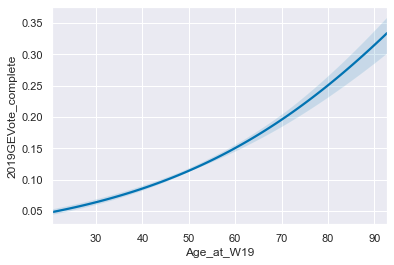

In [36]:
%%time
mask = (Bloc2017=="RemainBloc")&(euref2016=="LEAVE")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]=="LeaveBloc",logistic=True,n_boot=10,scatter=False)

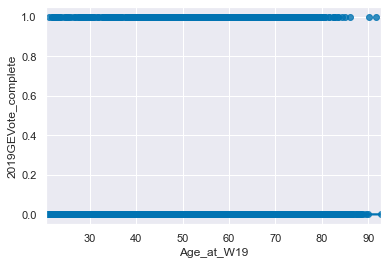

In [38]:
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]=="LeaveBloc")

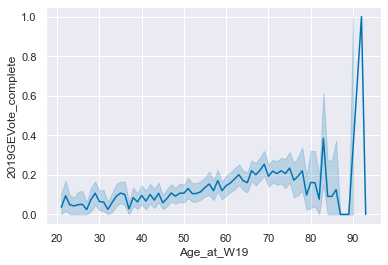

In [39]:
sns.lineplot(x=pan_dataset_ages["Age_at_W19"][mask].round(),y=Bloc2019[mask]=="LeaveBloc")

Wall time: 4.25 s


(0.0, 1.0)

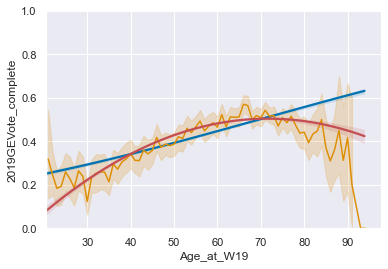

In [62]:
%%time
to_bloc = "LeaveBloc"
mask = (Bloc2017=="LeaveBloc")&(euref2016=="LEAVE")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]=="LeaveBloc",logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=pan_dataset_ages["Age_at_W19"][mask].round(),y=Bloc2019[mask]=="LeaveBloc")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]==to_bloc,order=2,n_boot=10,scatter=False,color='r');
plt.ylim(0,1);

Wall time: 3.89 s


(0.0, 1.0)

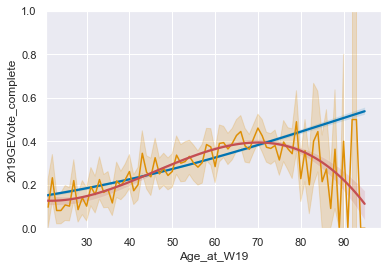

In [63]:
%%time
to_bloc = "LeaveBloc"
mask = (Bloc2017=="LeaveBloc")&(euref2016=="REMAIN")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=pan_dataset_ages["Age_at_W19"][mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
plt.ylim(0,1);

Wall time: 3.95 s


(0.0, 1.0)

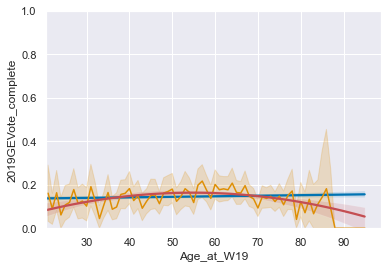

In [60]:
%%time
mask = (Bloc2017=="LeaveBloc")&(euref2016=="REMAIN")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]=="RemainBloc",logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=pan_dataset_ages["Age_at_W19"][mask].round(),y=Bloc2019[mask]=="RemainBloc")
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]=="RemainBloc",order=2,n_boot=10,scatter=False,color='r');
plt.ylim(0,1);

Wall time: 3.87 s


(0.0, 1.0)

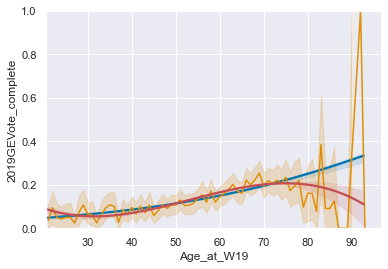

In [64]:
%%time
to_bloc = "LeaveBloc"
from_bloc = "RemainBloc"
eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=pan_dataset_ages["Age_at_W19"][mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=pan_dataset_ages["Age_at_W19"][mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
plt.ylim(0,1);

In [66]:
ages_at_w19 = pan_dataset_ages["Age_at_W19"]
ages_at_w19[ages_at_w19<20] = np.nan
ages_at_w19[ages_at_w19>80] = np.nan

Wall time: 3.27 s


(0.0, 1.0)

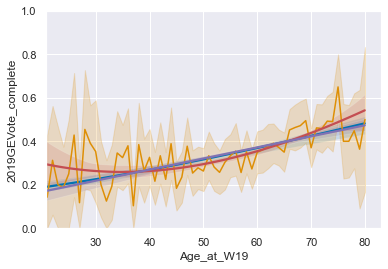

In [82]:
%%time
from_bloc = "RemainBloc"
to_bloc = "LeaveBloc"

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);

Wall time: 8.01 s


(0.0, 1.0)

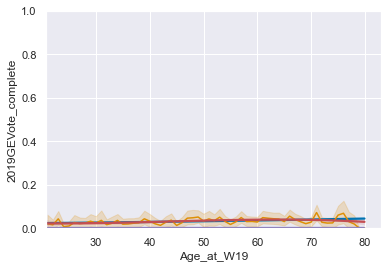

In [83]:
%%time
from_bloc = "RemainBloc"
to_bloc = "LeaveBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);

Wall time: 14.1 s


(0.0, 1.0)

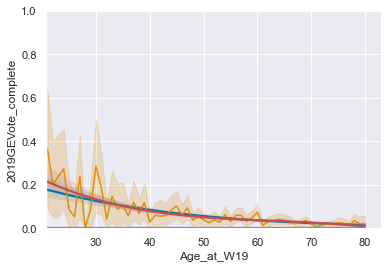

In [86]:
%%time
from_bloc = "LeaveBloc"
to_bloc = "RemainBloc"

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=100,scatter=False,color='m');
plt.ylim(0,1);

Wall time: 3.33 s


(0.0, 1.0)

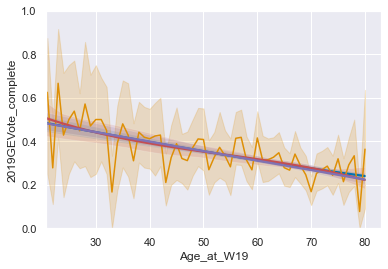

In [85]:
%%time
from_bloc = "LeaveBloc"
to_bloc = "RemainBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False)
sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);

Wall time: 735 ms


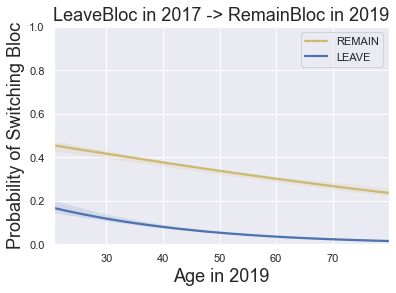

In [114]:
%%time
from_bloc = "LeaveBloc"
to_bloc = "RemainBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title("LeaveBloc in 2017 -> RemainBloc in 2019",fontsize=18);
plt.legend();

Wall time: 614 ms


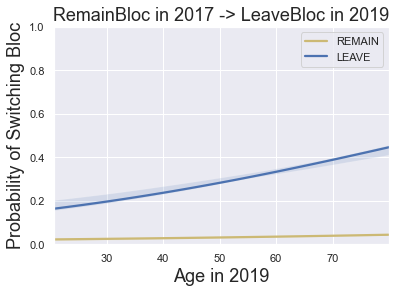

In [115]:
%%time
from_bloc = "RemainBloc"
to_bloc = "LeaveBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title("RemainBloc in 2017 -> LeaveBloc in 2019",fontsize=18);
plt.legend();

Wall time: 573 ms


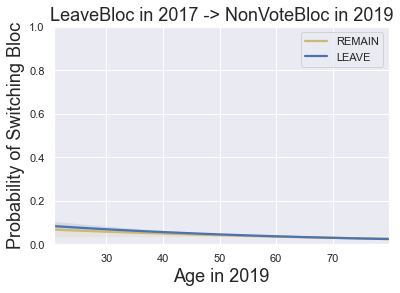

In [116]:
%%time
from_bloc = "LeaveBloc"
to_bloc = "NonVoteBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
plt.legend();

Wall time: 632 ms


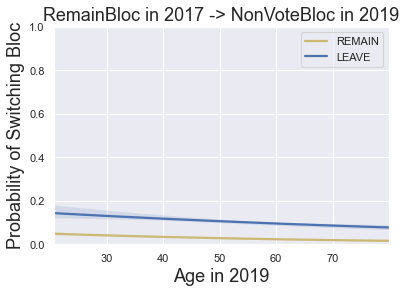

In [117]:
%%time
from_bloc = "RemainBloc"
to_bloc = "NonVoteBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
plt.legend();

Wall time: 232 ms


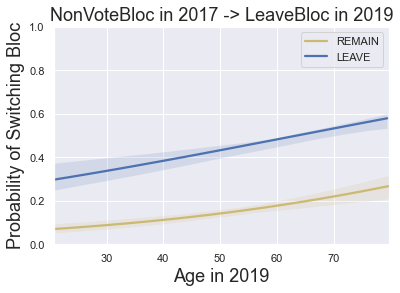

In [118]:
%%time
from_bloc = "NonVoteBloc"
to_bloc = "LeaveBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
plt.legend();

Wall time: 218 ms


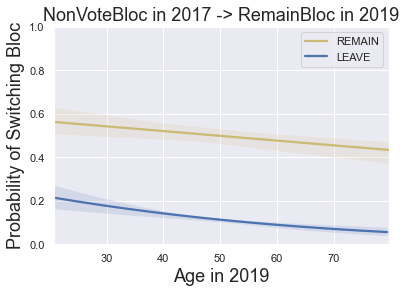

In [133]:
%%time
from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"

eurefvote = "REMAIN"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

eurefvote = "LEAVE"
mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

# sns.lineplot(x=ages_at_w19[mask].round(),y=Bloc2019[mask]==to_bloc)
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,order=3,n_boot=10,scatter=False,color='r');
# sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,robust=True,n_boot=10,scatter=False,color='m');
plt.ylim(0,1);
plt.ylabel("Probability of Switching Bloc",fontsize=18);
plt.xlabel("Age in 2019",fontsize=18);
plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
plt.legend();

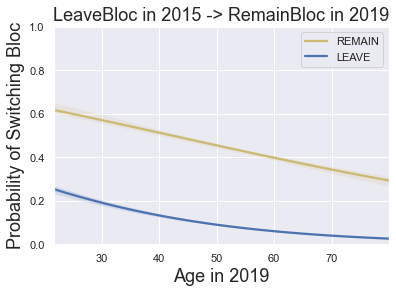

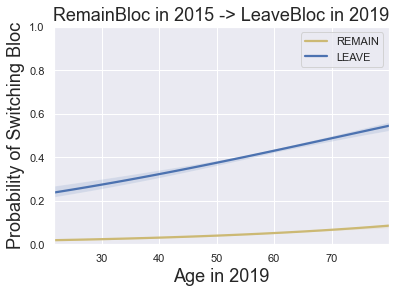

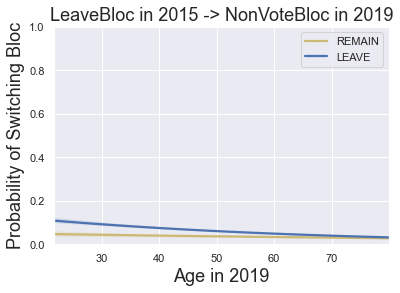

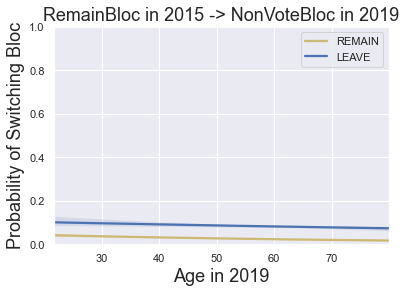

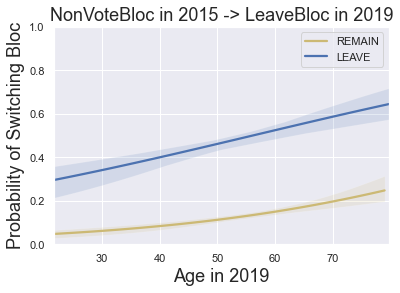

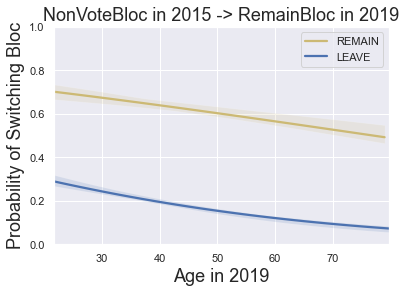

Wall time: 4.63 s


In [120]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2015==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2015==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("Age in 2019",fontsize=18);
    plt.title(from_bloc+" in 2015 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

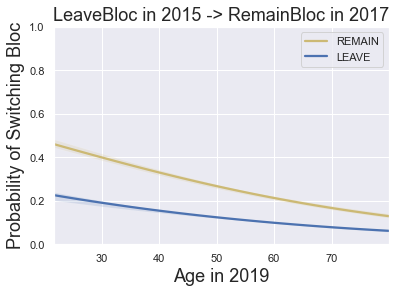

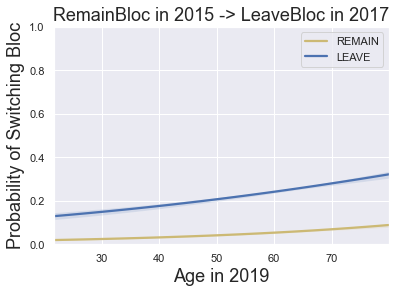

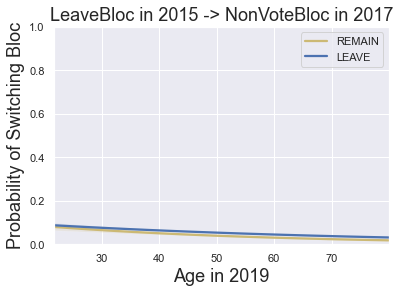

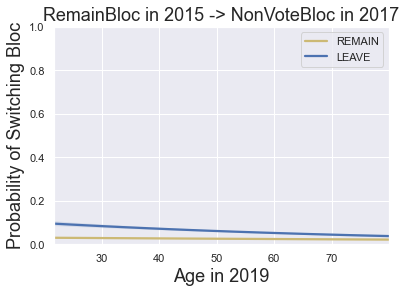

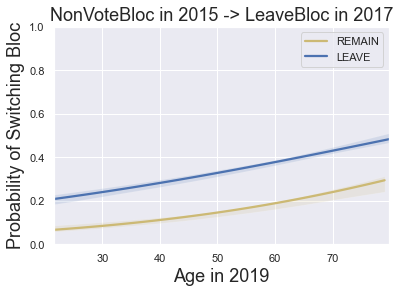

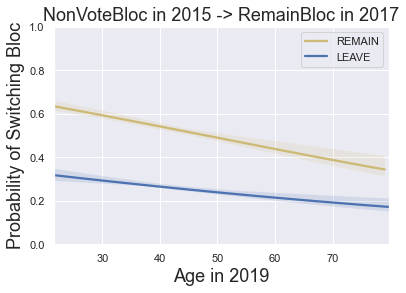

Wall time: 6.39 s


In [121]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2015==from_bloc)&(euref2016==eurefvote)&Bloc2017.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2017[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2015==from_bloc)&(euref2016==eurefvote)&Bloc2017.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2017[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("Age in 2019",fontsize=18);
    plt.title(from_bloc+" in 2015 -> "+to_bloc+" in 2017",fontsize=18);
    plt.legend();
    plt.show()

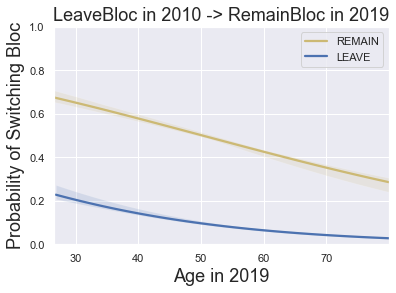

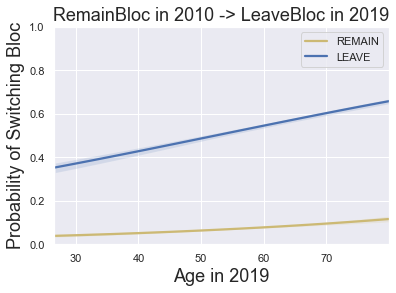

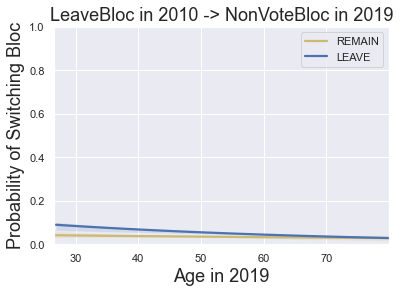

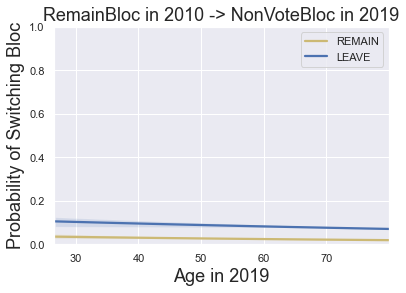

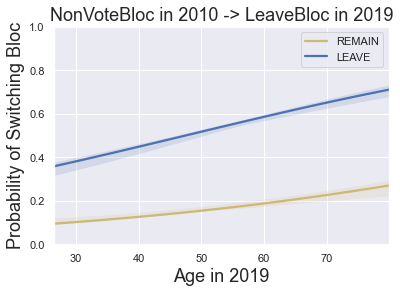

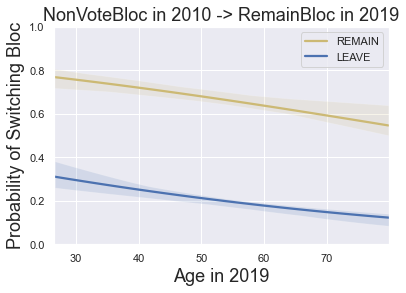

Wall time: 4.28 s


In [131]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2010==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2010==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("Age in 2019",fontsize=18);
    plt.title(from_bloc+" in 2010 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

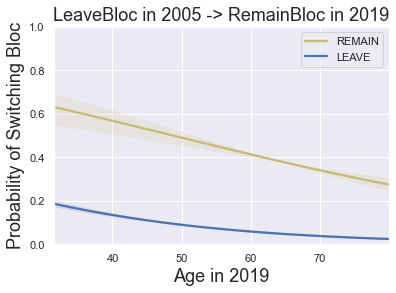

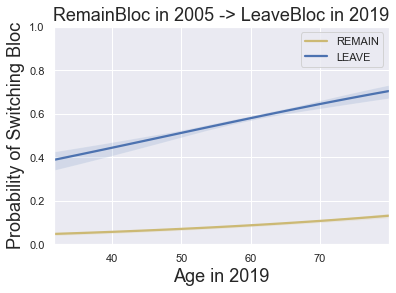

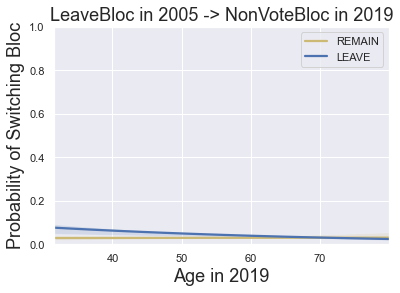

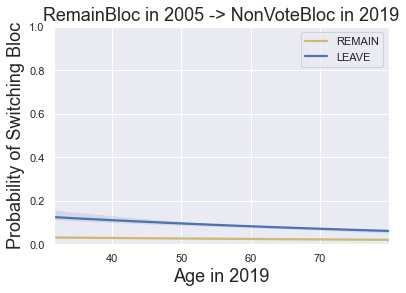

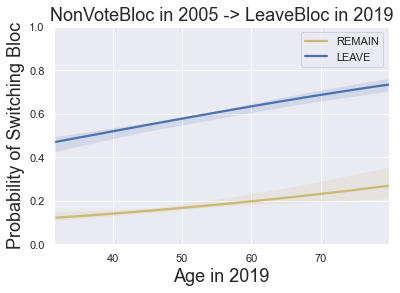

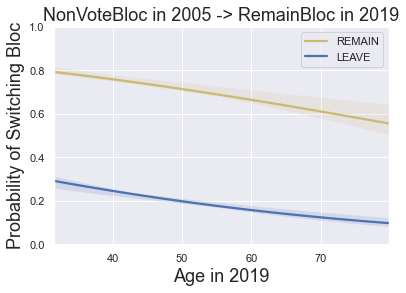

Wall time: 3.89 s


In [132]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2005==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2005==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=ages_at_w19[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("Age in 2019",fontsize=18);
    plt.title(from_bloc+" in 2005 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

In [140]:
search(pan_dataset_votes,"2017")

2017GEVote             70248
2017GEVote_complete    97006
2017GEVote_simple      96529
2017LE                 32026
2017LE_complete        97006
2017LE_simple          96529
dtype: int64

In [139]:
remainers = pan_dataset_votes["2016EUVote_complete"]=="REMAIN"

In [149]:
pd.crosstab(pan_dataset_votes["2017GEVote_complete"][remainers].replace(bloc_replace_dict),pan_dataset_votes["2019GEVote_complete"][remainers].replace(bloc_replace_dict))

2019GEVote_complete,LeaveBloc,NonVoteBloc,RemainBloc
2017GEVote_complete,,,
LeaveBloc,2150,124,1018
NonVoteBloc,91,226,322
RemainBloc,323,280,9224


In [148]:
pan_dataset_votes["2017GEVote_complete"][remainers].replace(bloc_replace_dict).value_counts()
#.value_counts()

RemainBloc     23438
LeaveBloc       6971
NonVoteBloc     1859
Name: 2017GEVote_complete, dtype: int64

In [146]:
bloc_replace_dict

{'BNP': 'LeaveBloc',
 'CON': 'LeaveBloc',
 'DK': nan,
 'GP': 'RemainBloc',
 'LAB': 'RemainBloc',
 'LD': 'RemainBloc',
 'OTH': nan,
 'PC': 'RemainBloc',
 'SNP': 'RemainBloc',
 'UKIP': 'LeaveBloc',
 'DNV': 'NonVoteBloc',
 'TYTV(Def)': nan,
 'TYTV(Maybe)': nan,
 'Not Present': nan,
 'UNK': nan,
 'BXP': nan}

In [161]:
# ages_at_w19 = pan_dataset_ages["Age_at_W19"]
# ages_at_w19[ages_at_w19<20] = np.nan
# ages_at_w19[ages_at_w19>80] = np.nan

al_values = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
al_plus_lr_values = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]+pan_dataset_allr_values['Economic: Left(0) <-> Right(200){uniform}']
lr_values = pan_dataset_allr_values['Economic: Left(0) <-> Right(200){uniform}']

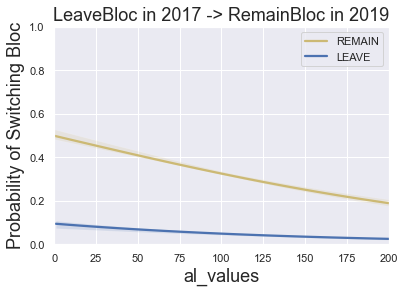

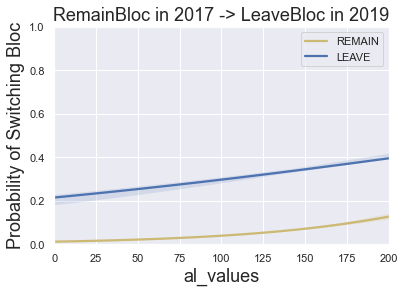

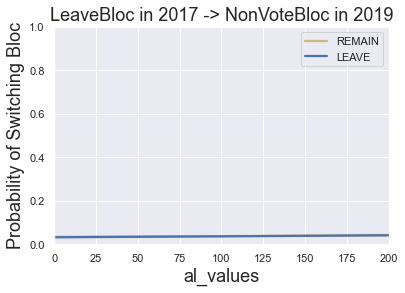

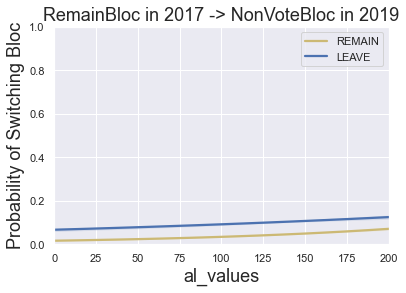

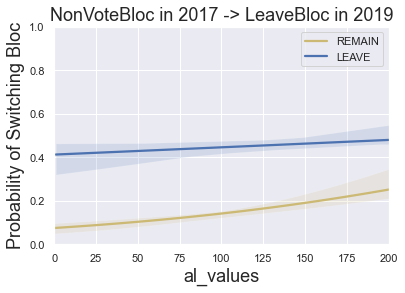

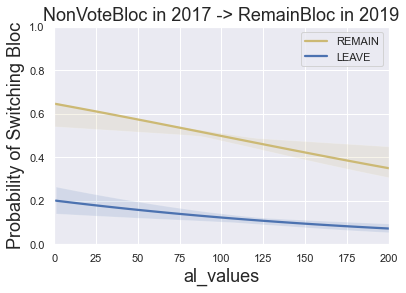

Wall time: 4.8 s


In [153]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=al_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=al_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("al_values",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

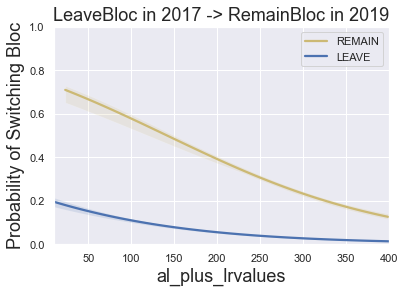

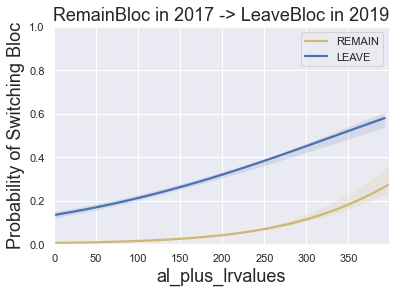

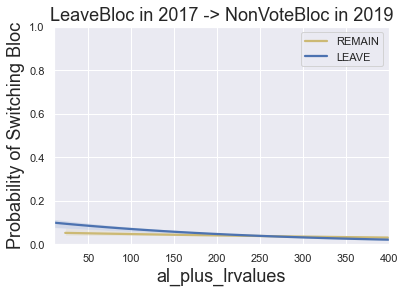

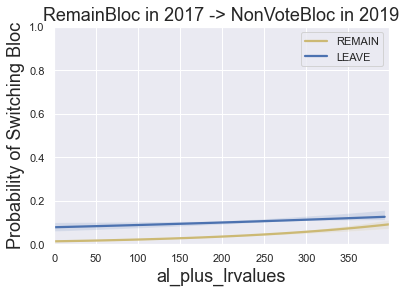

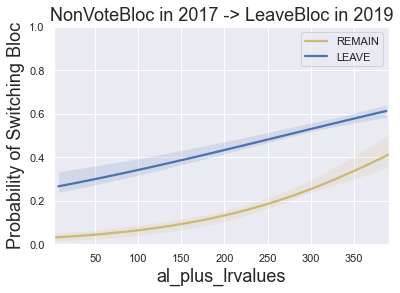

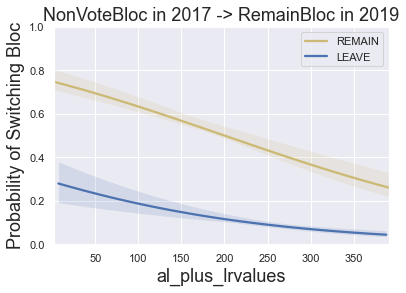

Wall time: 4.85 s


In [157]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=al_plus_lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=al_plus_lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("al_plus_lrvalues",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

In [158]:
age_groups_at_w19 = pan_dataset_ages["Age_at_W19"]
temp = age_groups_at_w19.copy()
age_groups_at_w19.loc[temp>=55] = "55+"
age_groups_at_w19.loc[temp<55] = "<55"

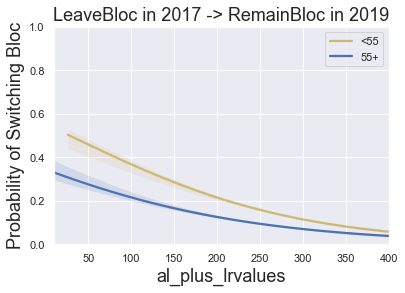

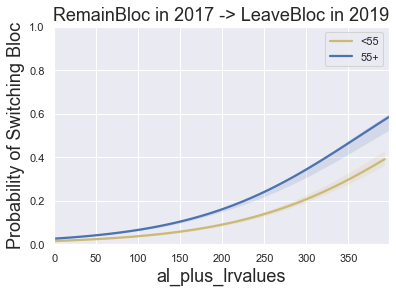

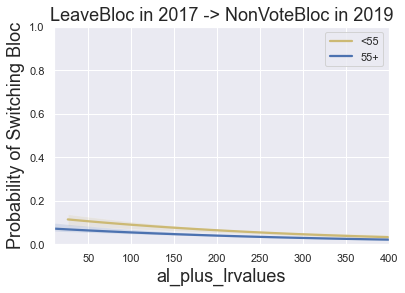

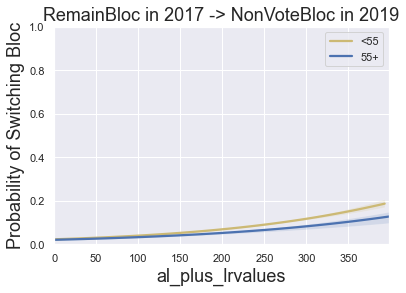

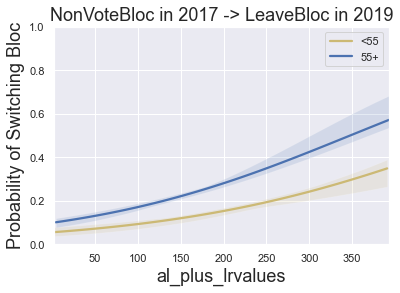

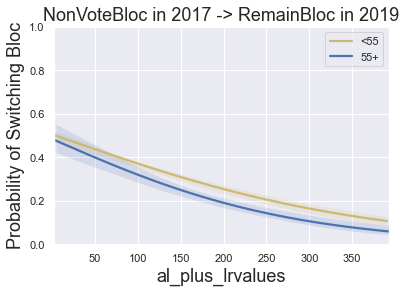

Wall time: 4.93 s


In [159]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "<55"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=al_plus_lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "55+"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=al_plus_lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("al_plus_lrvalues",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

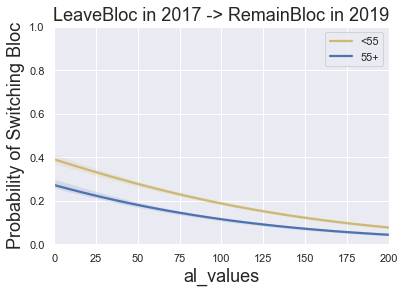

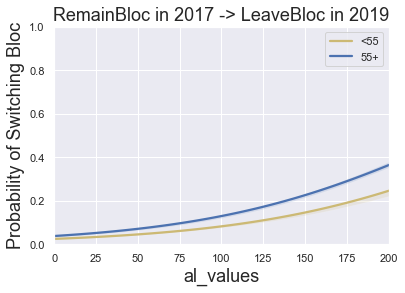

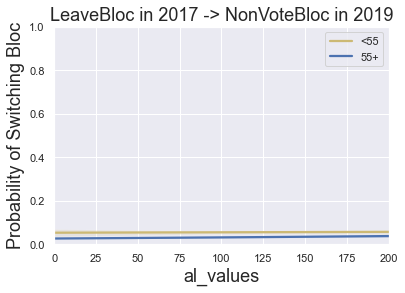

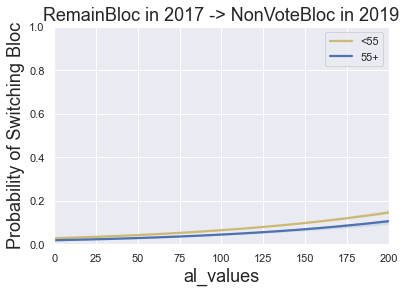

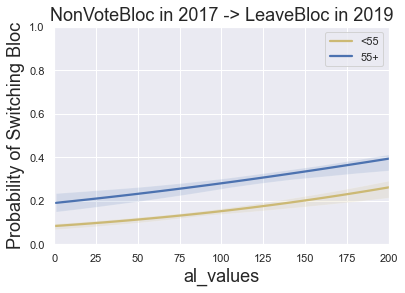

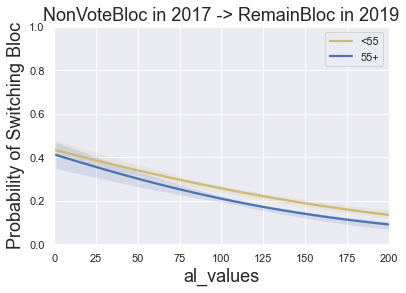

Wall time: 5.93 s


In [160]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "<55"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=al_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "55+"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=al_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("al_values",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

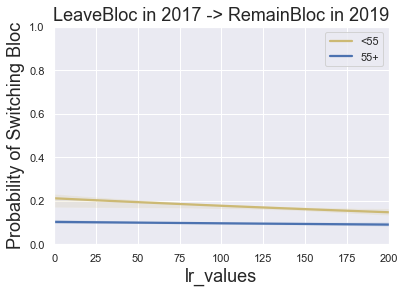

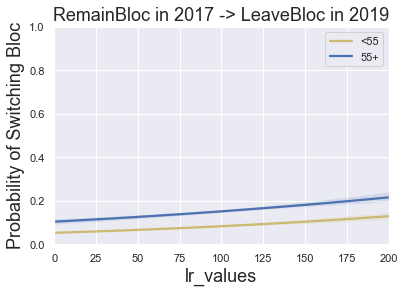

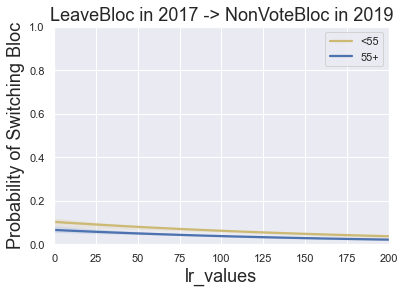

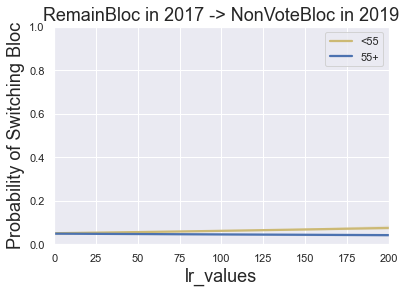

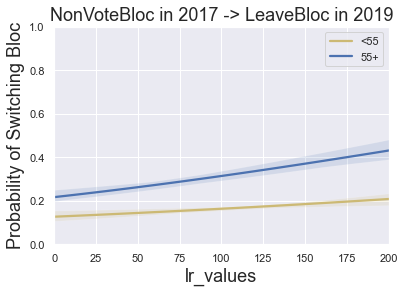

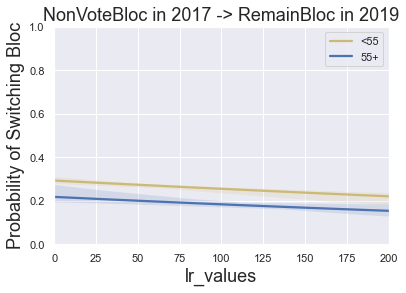

Wall time: 5.18 s


In [163]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "<55"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "55+"
    mask = (Bloc2017==from_bloc)&(age_groups_at_w19==eurefvote)&Bloc2019.notnull()&age_groups_at_w19.notnull()
    sns.regplot(x=lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("lr_values",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

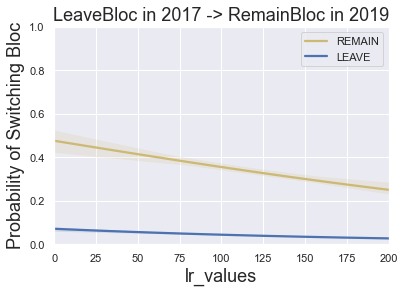

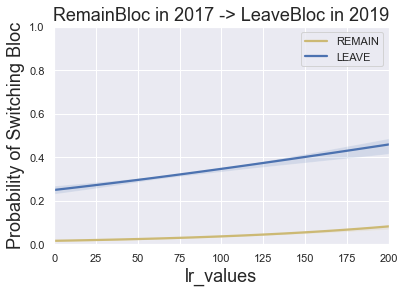

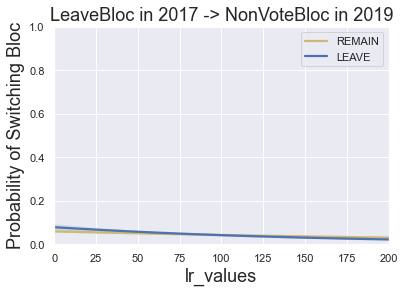

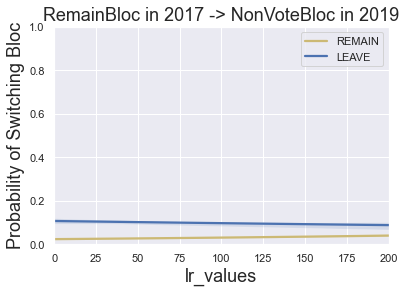

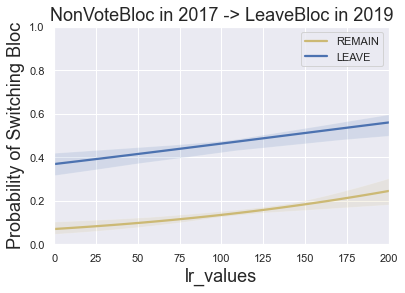

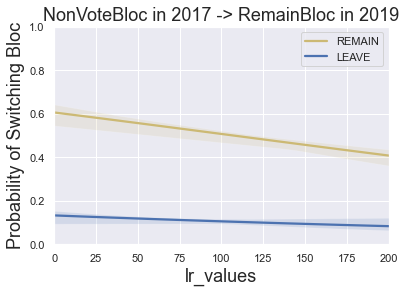

Wall time: 4.79 s


In [164]:
%%time
combinations = [("LeaveBloc","RemainBloc"),("RemainBloc","LeaveBloc"),("LeaveBloc","NonVoteBloc"),("RemainBloc","NonVoteBloc"),("NonVoteBloc","LeaveBloc"),("NonVoteBloc","RemainBloc")]


from_bloc = "NonVoteBloc"
to_bloc = "RemainBloc"
for (from_bloc,to_bloc) in combinations:

    plt.figure()

    eurefvote = "REMAIN"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='y',label=eurefvote)

    eurefvote = "LEAVE"
    mask = (Bloc2017==from_bloc)&(euref2016==eurefvote)&Bloc2019.notnull()&ages_at_w19.notnull()
    sns.regplot(x=lr_values[mask],y=Bloc2019[mask]==to_bloc,logistic=True,n_boot=10,scatter=False, color='b',label=eurefvote)

    plt.ylim(0,1);
    plt.ylabel("Probability of Switching Bloc",fontsize=18);
    plt.xlabel("lr_values",fontsize=18);
    plt.title(from_bloc+" in 2017 -> "+to_bloc+" in 2019",fontsize=18);
    plt.legend();
    plt.show()

In [ ]:
### Okay - but what is the best variable to predict bloc-switching behaviour?


# Start with people who switch either way vs non-switchers

# Or is it easier to start with LeaveBloc -> Remain -> Remain|LeaveBloc?

In [ ]:
BES_reduced_with_na.index = BES_Panel.index

In [37]:
switch_to_remain = Bloc2017.copy()
switch_to_remain[:] = np.nan
switch_to_remain = switch_to_remain.astype('float')

switch_to_remain.loc[(Bloc2017=="LeaveBloc")&(euref2016=="REMAIN")&(Bloc2019=="RemainBloc")]=1.0
switch_to_remain.loc[(Bloc2017=="LeaveBloc")&(euref2016=="REMAIN")&(Bloc2019=="LeaveBloc")]=0.0

In [38]:
switch_to_leave = Bloc2017.copy()
switch_to_leave[:] = np.nan
switch_to_leave = switch_to_leave.astype('float')

switch_to_leave.loc[(Bloc2017=="RemainBloc")&(euref2016=="LEAVE")&(Bloc2019=="LeaveBloc")]=1.0
switch_to_leave.loc[(Bloc2017=="RemainBloc")&(euref2016=="LEAVE")&(Bloc2019=="RemainBloc")]=0.0

In [4]:
# df = BES_Panel
# # df.columns[df.dtypes=="category"]
# dummies = pd.get_dummies(df.select_dtypes('category'), dummy_na=True)
# df[dummies.columns] = dummies
# df.drop(df.columns[df.dtypes=="category"],axis=1,inplace=True)

In [41]:
BES_reduced_with_na["switched_to_remainbloc"] = switch_to_remain.loc[BES_reduced_with_na.index]

In [48]:
BES_reduced_with_na["switched_to_leavebloc"].value_counts(dropna=False)

NaN    35738
0.0     1429
1.0      792
Name: switched_to_leavebloc, dtype: int64

In [27]:
search(BES_Panel,"wt")

wt_new_              37959
wt_new_W1_            2427
wt_fresh_            18217
wt_new_W13           14647
wt_new_W13_result    14647
wt_new_W6             9587
wt_new_W2             8388
enviroGrowth         37959
dtype: int64

[0]	validation_0-rmse:0.490433
Will train until validation_0-rmse hasn't improved in 9.200000000000001 rounds.
[1]	validation_0-rmse:0.48131
[2]	validation_0-rmse:0.473193
[3]	validation_0-rmse:0.465134
[4]	validation_0-rmse:0.458382
[5]	validation_0-rmse:0.451931
[6]	validation_0-rmse:0.445435
[7]	validation_0-rmse:0.439348
[8]	validation_0-rmse:0.43431
[9]	validation_0-rmse:0.428935
[10]	validation_0-rmse:0.424476
[11]	validation_0-rmse:0.420432
[12]	validation_0-rmse:0.416498
[13]	validation_0-rmse:0.41315
[14]	validation_0-rmse:0.409871
[15]	validation_0-rmse:0.407221
[16]	validation_0-rmse:0.404101
[17]	validation_0-rmse:0.401648
[18]	validation_0-rmse:0.399293
[19]	validation_0-rmse:0.396685
[20]	validation_0-rmse:0.394832
[21]	validation_0-rmse:0.39287
[22]	validation_0-rmse:0.390875
[23]	validation_0-rmse:0.389561
[24]	validation_0-rmse:0.387422
[25]	validation_0-rmse:0.38594
[26]	validation_0-rmse:0.384099
[27]	validation_0-rmse:0.382291
[28]	validation_0-rmse:0.381088
[29]	va

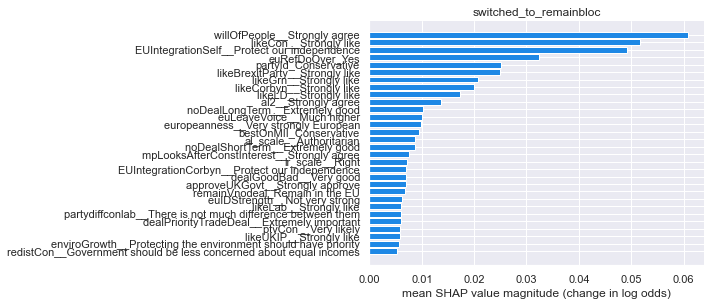

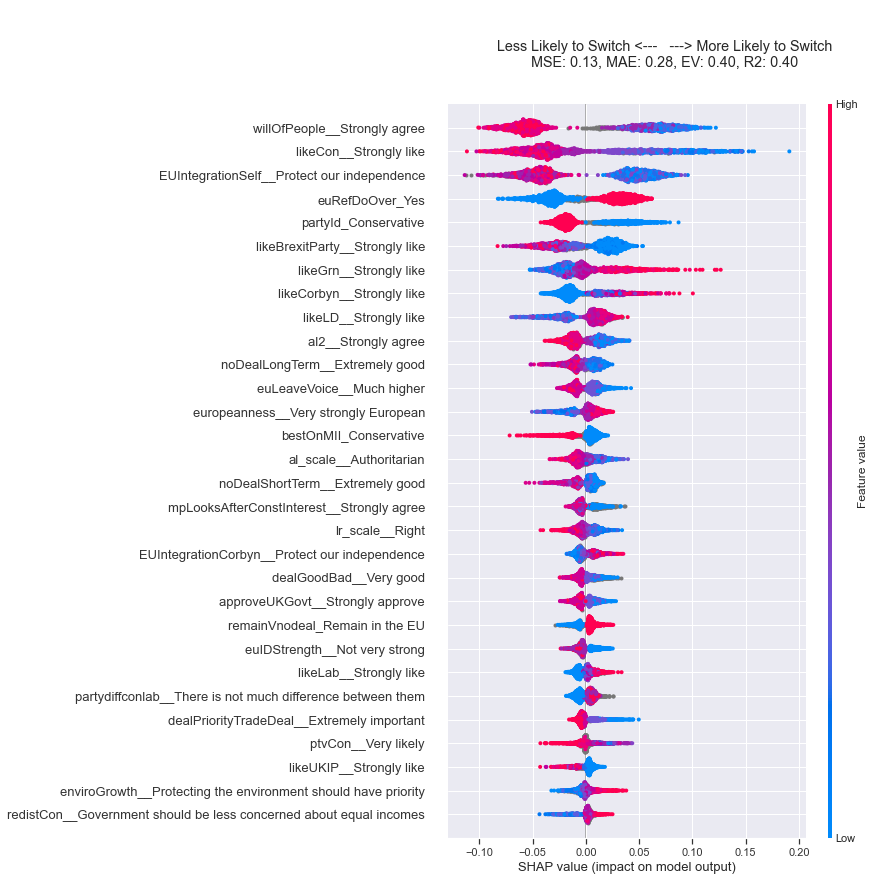

(<shap.explainers.tree.TreeExplainer at 0x13019908>,
 array([[ 3.7654831e-05, -3.8855671e-04, -2.2476066e-03, ...,
          2.6343283e-04,  7.9153304e-04, -7.8312754e-05],
        [-1.6705862e-04, -1.3382640e-03, -2.3978911e-03, ...,
         -3.9598899e-04, -4.3943111e-04, -2.6581116e-04],
        [ 3.9856925e-05, -5.0908077e-04, -1.0910985e-03, ...,
         -1.7611877e-04, -2.5383986e-03, -1.8773488e-03],
        ...,
        [ 5.6218490e-05,  4.5438256e-04,  4.9630674e-03, ...,
          3.1506002e-04,  4.2267935e-04,  4.6541034e-05],
        [ 1.8613864e-04, -1.4258767e-03, -3.9715213e-03, ...,
          9.8857323e-05,  3.7326093e-04, -3.4145694e-04],
        [ 5.6127625e-05, -1.1710180e-04, -1.1484679e-03, ...,
         -8.5421395e-04, -2.0952620e-04, -3.6554760e-04]], dtype=float32),
 Index(['turnoutUKGeneral__Very likely that I will vote',
        'partyIdStrength__Not very strong',
        'churchAttendanceW15__Once a week or more',
        'polAttention__Pay a great deal of 

In [45]:
# %%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "switched_to_remainbloc"
var_stub = "switched_to_remainbloc"

var_list = ["switched_to_remainbloc"]
var_stub_list = [var_stub,
                 "generalElectionVote","euroElectionVote",
                ]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = BES_reduced_with_na["switched_to_remainbloc"].notnull() & BES_Panel["wt_new_"].notnull()
colname = "Switch to Remain Bloc"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Switch <---   ---> More Likely to Switch")

In [35]:
BES_reduced_with_na["switched_to_remainbloc"].value_counts(dropna=False)

NaN    37959
Name: switched_to_remainbloc, dtype: int64

In [46]:
BES_reduced_with_na["switched_to_leavebloc"] = switch_to_leave.loc[BES_reduced_with_na.index]

[0]	validation_0-rmse:0.490323
Will train until validation_0-rmse hasn't improved in 8.4 rounds.
[1]	validation_0-rmse:0.481982
[2]	validation_0-rmse:0.472433
[3]	validation_0-rmse:0.465128
[4]	validation_0-rmse:0.457202
[5]	validation_0-rmse:0.450141
[6]	validation_0-rmse:0.443201
[7]	validation_0-rmse:0.437418
[8]	validation_0-rmse:0.432429
[9]	validation_0-rmse:0.428365
[10]	validation_0-rmse:0.423616
[11]	validation_0-rmse:0.419715
[12]	validation_0-rmse:0.415384
[13]	validation_0-rmse:0.411633
[14]	validation_0-rmse:0.40861
[15]	validation_0-rmse:0.406088
[16]	validation_0-rmse:0.402741
[17]	validation_0-rmse:0.399851
[18]	validation_0-rmse:0.3966
[19]	validation_0-rmse:0.393996
[20]	validation_0-rmse:0.391524
[21]	validation_0-rmse:0.389808
[22]	validation_0-rmse:0.387785
[23]	validation_0-rmse:0.386211
[24]	validation_0-rmse:0.383873
[25]	validation_0-rmse:0.382782
[26]	validation_0-rmse:0.381313
[27]	validation_0-rmse:0.379825
[28]	validation_0-rmse:0.378769
[29]	validation_0-r

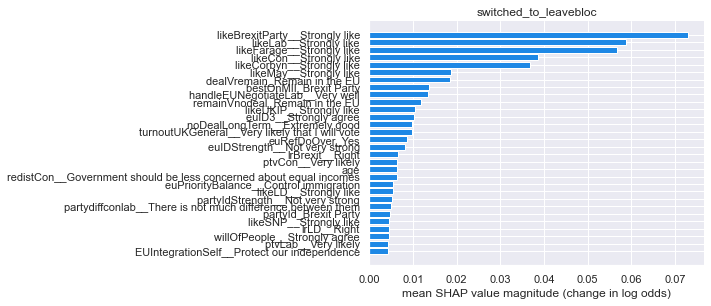

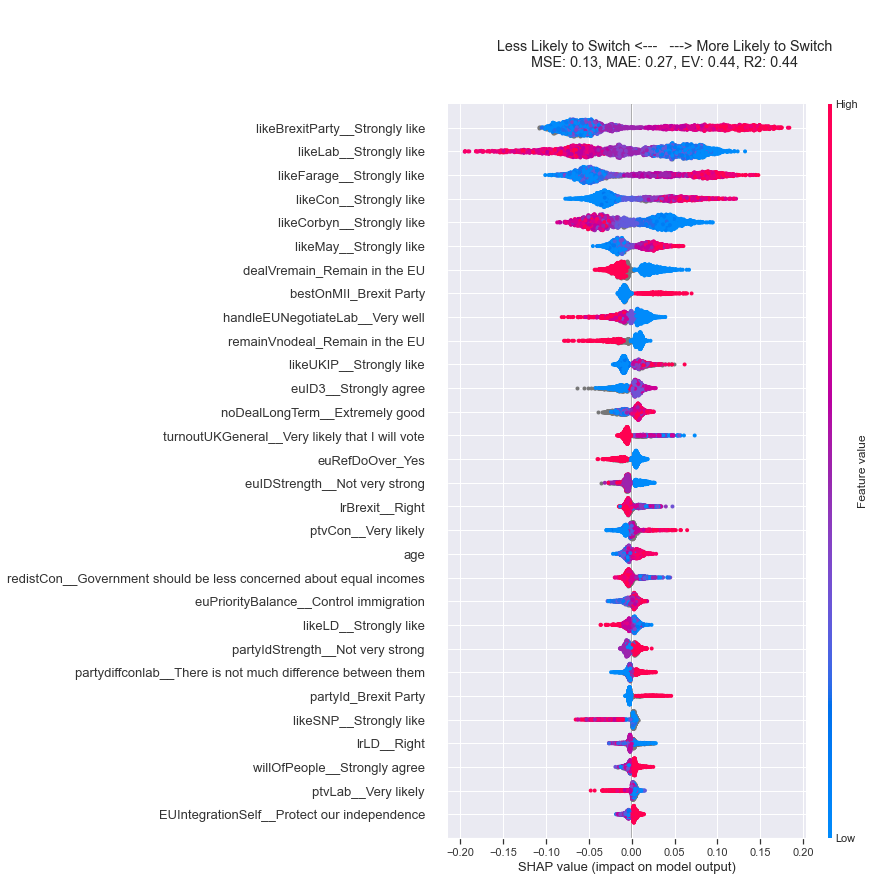

(<shap.explainers.tree.TreeExplainer at 0xd1f6808>,
 array([[-3.08557507e-03, -3.48982657e-03,  7.35386799e-04, ...,
          1.68902625e-05, -6.21011946e-04, -1.30825108e-04],
        [-1.06207365e-02,  8.54222104e-04, -5.81781380e-04, ...,
          6.02801738e-05,  4.91734501e-03,  1.00707018e-03],
        [-7.17069954e-03, -1.02180464e-03, -9.19812592e-04, ...,
         -1.51408662e-04,  7.79390029e-05,  2.35853266e-04],
        ...,
        [-5.20561403e-03, -1.27436861e-03,  2.34713327e-04, ...,
          4.74217704e-05,  8.94208206e-05, -2.50521582e-04],
        [-4.48132725e-03, -4.16027894e-03, -5.02701057e-03, ...,
          8.26814503e-05,  1.18559622e-03,  4.28095518e-06],
        [ 2.42339205e-02, -8.46072007e-03,  5.18833869e-04, ...,
          4.49038169e-04, -2.16592496e-04,  3.74572846e-04]], dtype=float32),
 Index(['turnoutUKGeneral__Very likely that I will vote',
        'partyIdStrength__Not very strong',
        'churchAttendanceW15__Once a week or more',
        

In [49]:
# %%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "switched_to_leavebloc"
var_stub = "switched_to_"

var_list = ["switched_to_leavebloc"]
var_stub_list = [var_stub,
                 "generalElectionVote","euroElectionVote",
                ]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = BES_reduced_with_na["switched_to_leavebloc"].notnull() & BES_Panel["wt_new_"].notnull()
colname = "Switch to Leave Bloc"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Switch <---   ---> More Likely to Switch")